<a href="https://colab.research.google.com/github/marmal88/Cars/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Identification dataset

In [1]:
jupyter nbconvert Cars.ipynb --to python
pipreqs --force .
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Preliminary EDA from csv

In [106]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import os

In [110]:
names_df = pd.read_csv('data/annotations/class_names.csv', header=None)
names_df.rename(columns={0:"class_names"}, inplace=True)
names_df.index = (np.arange(1, len(names_df) + 1))

data_df = pd.read_csv('data/annotations/cars_annos.csv', sep=";")

In [111]:
df = pd.merge(data_df, names_df, how='inner', left_on="class", right_index=True)

df.head()

,Image,x1,y1,x2,y2,class,test,class_names
0,000001.jpg,112,7,853,717,1,0,AM General Hummer SUV 2000
1,000002.jpg,48,24,441,202,1,0,AM General Hummer SUV 2000
2,000003.jpg,7,4,277,180,1,0,AM General Hummer SUV 2000
3,000004.jpg,33,50,197,150,1,0,AM General Hummer SUV 2000
4,000005.jpg,5,8,83,58,1,0,AM General Hummer SUV 2000


In [112]:
df.shape

(16185, 8)

In [115]:
# Check to see if the dataset split is already fair by ensuring stratification of classes over the train and test set
test_df = df.loc[df["test"]==1, "class"]
train_df = df.loc[df["test"]==0, "class"]

print(f"total number of classes entire dataset {df['class'].nunique()}")
print(f'total number of classes in test set {test_df.nunique()}')
print(f'total number of classes in test set {train_df.nunique()}')

total number of classes entire dataset 196
total number of classes in test set 196
total number of classes in test set 196


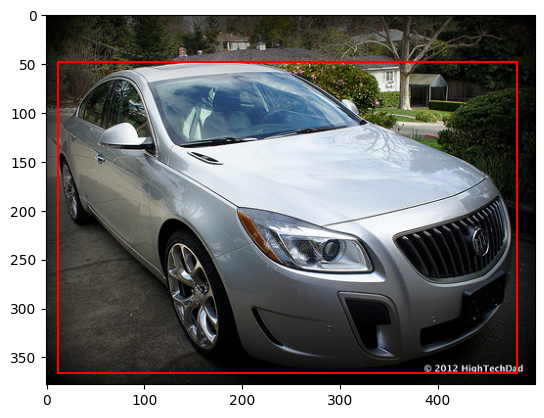

In [118]:
# Random check to see if bounding boxes are able to completely cover the car in question
num = np.random.randint(len(df))
img_name, x1, y1, x2, y2, _, _, class_names = df.iloc[num,:]

# print(img_name, x1, y1, x2, y2, class_names)

img = Image.open(f'data/car_ims/{img_name}')
plt.imshow(img)
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1.5, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

In [107]:
# Check to see if there are different modes in the dataset RGB vs RGBA
df["ext"] = df["Image"].apply(lambda x: os.path.splitext(x)[1])
df.ext.unique()

array(['.jpg'], dtype=object)

# Call dependencies



In [2]:
import torchvision
import pandas
import torch